<a href="https://colab.research.google.com/github/usnaik/data-science/blob/main/M8_NB_MiniProject_2_EDA_Timeseries-USN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Exploratory Data Analysis - Timeseries

## Problem Statement

Perform Exploratory Data Analysis (EDA) of Retail Sales time series data using visualizations and statistical methods.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform Exploratory data analysis (EDA) of the time series
* perform Time series behaviour analysis in qualitative and quantitative terms
* summarize the findings based on the EDA

## Dataset

The dataset is a French retail company quarterly sales data that has been made available from  Prof. Rob Hyndman's ["Forecasting Methods & Applications"](https://robjhyndman.com/forecasting/) book. There are 24 entries, from 2012-03-31 to 2017-12-31 (Quarterly sales values).

## Introduction

Exploratory data analysis of time series data starts with data visualization.

- Are there consistent patterns?
- Is there a significant trend?
- Is seasonality important?
- Is there evidence of the presence of business cycles?
- Are there any outliers in the data that need to be explained by those with expert knowledge?
- How strong are the relationships among the variables available for analysis?

Various tools have been developed to help with these analyses.

## Grading = 10 Points

In [ ]:
#@title Download Dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/ts_frenchretail.csv

### Importing libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-white')
%matplotlib inline
import scipy
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import signal
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

### Import the Data

In [ ]:
# Read dataset with 'Date' as index
df = pd.read_csv('ts_frenchretail.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Sales
Date,
2012-03-31,362000
2012-06-30,385000
2012-09-30,432000
2012-12-31,341000
2013-03-31,382000


## Exploratory Data Analysis

### **Preprocessing** (1 point)

#### Divide the sales by 1000

Sales numbers are in thousands, so divide by 1000 to make it easier to work with numbers

In [ ]:
df['Sales'] = df['Sales'].apply(lambda x: x / 1000 if x > 1000 else x)
df.head()

,Sales
Date,
2012-03-31,362.0
2012-06-30,385.0
2012-09-30,432.0
2012-12-31,341.0
2013-03-31,382.0


#### Check for missing values     

In [ ]:
df.isnull().sum()

,0
Sales,0


### **Visualization**

#### Visualize the time series (2012 to 2017) (1 point)

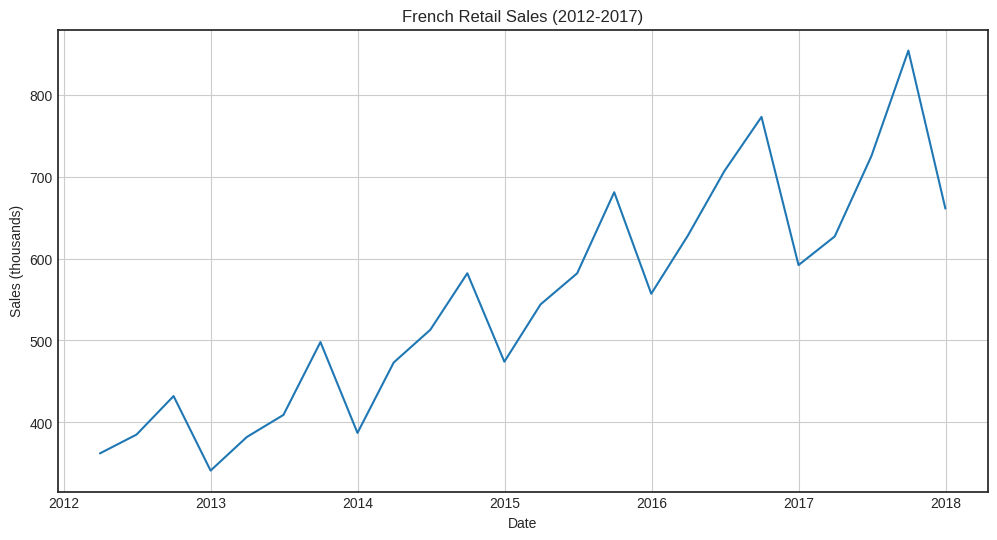

In [ ]:
def plot_ts(data, title):
  """Plots a time series.

  Args:
    data: Pandas Series or DataFrame with a DatetimeIndex.
    title: Title for the plot.
  """
  plt.figure(figsize=(12, 6))
  plt.plot(data)
  plt.title(title)
  plt.xlabel("Date")
  plt.ylabel("Sales (thousands)")
  plt.grid(True)
  plt.show()

plot_ts(df['Sales'], "French Retail Sales (2012-2017)")

#### Visualize the data year-wise and quarter-wise (2 points)

- Box plot to see distribution of sales in each year
- Create year-wise subplots to visualize the quarterly Sales per year
- Compute Percentage growth each year

Make a report of your observations.

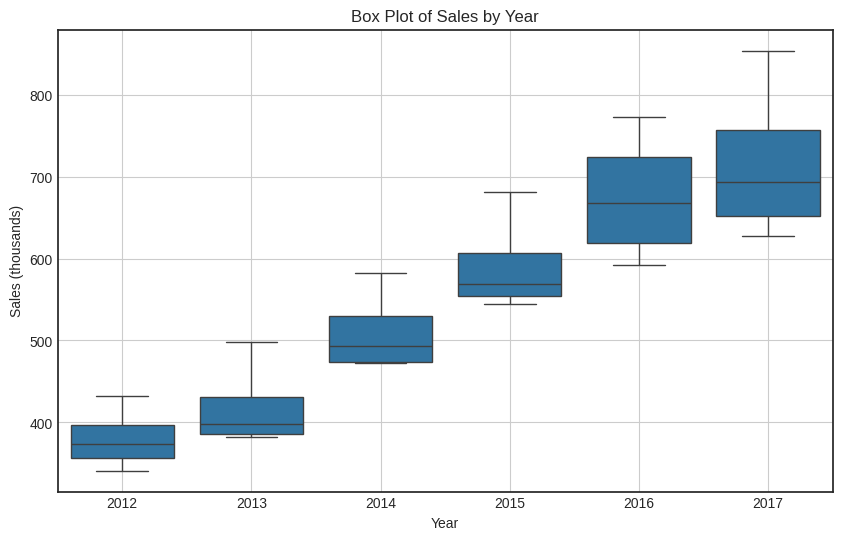

In [ ]:
# Add 'year' and 'quarter' columns for easier plotting
df['year'] = df.index.year
df['quarter'] = df.index.quarter

# Box plot to see distribution of sales in each year
df['year'] = df.index.year
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='Sales', data=df)
plt.title('Box Plot of Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales (thousands)')
plt.grid(True)
plt.show()

In [ ]:
df.head()

,Sales,year,quarter
Date,,,
2012-03-31,362.0,2012,1
2012-06-30,385.0,2012,2
2012-09-30,432.0,2012,3
2012-12-31,341.0,2012,4
2013-03-31,382.0,2013,1


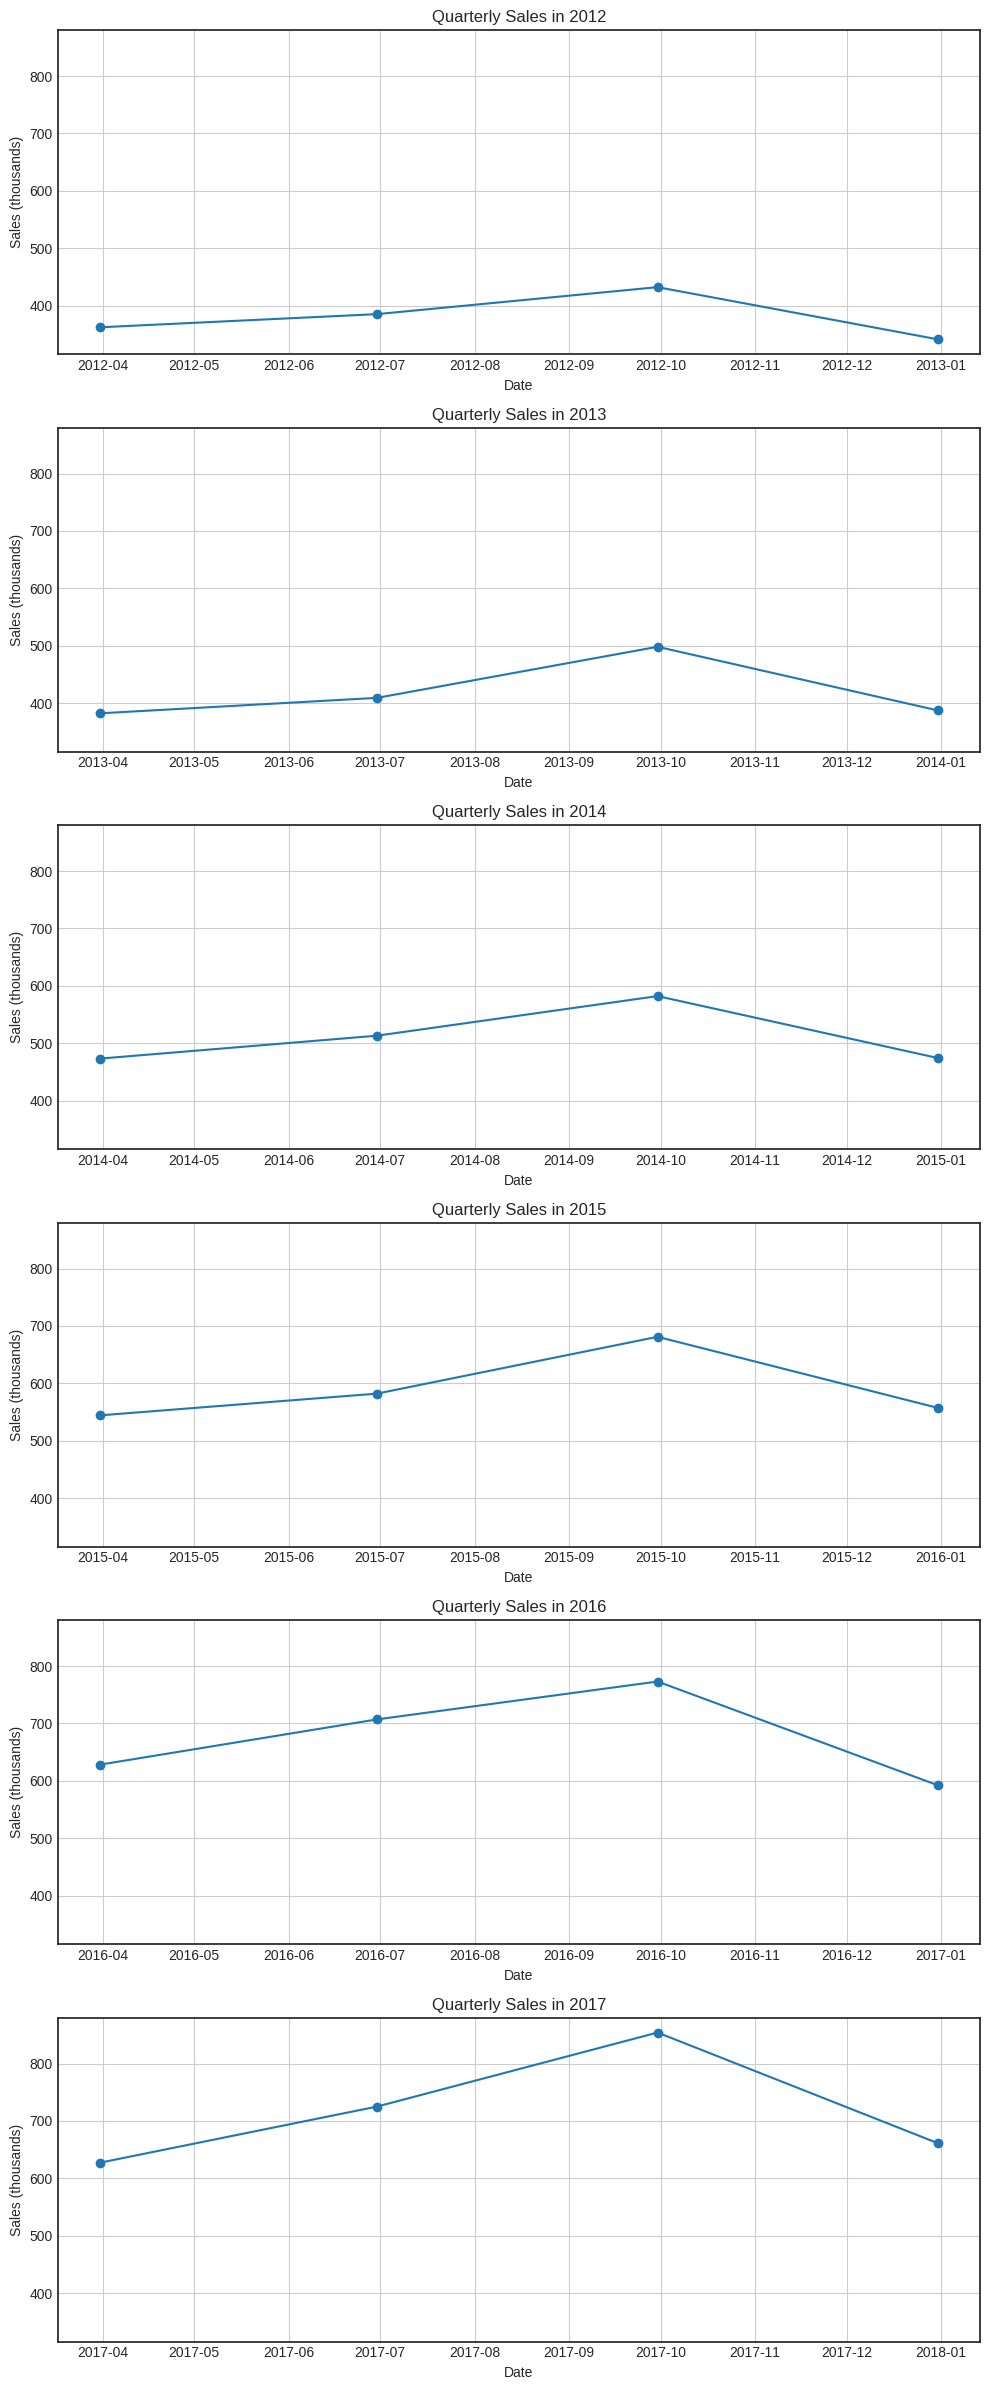

In [ ]:
# Create year-wise subplots to visualize the quarterly Sales per year
years = df.index.year.unique()
n_years = len(years)
fig, axes = plt.subplots(n_years, 1, figsize=(10, n_years * 4), sharey=True)

for i, year in enumerate(years):
    df_year = df[df.index.year == year]
    axes[i].plot(df_year.index, df_year['Sales'], marker='o')
    axes[i].set_title(f'Quarterly Sales in {year}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Sales (thousands)')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Percentage growth each year
yearly_sales = df.resample('Y')['Sales'].sum()
yearly_growth = yearly_sales.pct_change() * 100
print("Yearly Sales Growth (%):")
print(yearly_growth)

Yearly Sales Growth (%):
Date
2012-12-31          NaN
2013-12-31    10.263158
2014-12-31    21.837709
2015-12-31    15.768854
2016-12-31    14.213198
2017-12-31     6.185185
Freq: YE-DEC, Name: Sales, dtype: float64


**Observations:**
- The box plot shows a general upward trend in sales distribution over the years, indicated by higher median and quartile values in later years.
- There is some variability in sales within each year, likely due to seasonality.
- The year-wise subplots clearly show the quarterly pattern, with sales typically peaking in the fourth quarter of each year.
- The percentage growth computation quantifies the year-over-year increase in total sales.
- The growth rate varies each year, with some years showing stronger growth than others.
- The last year (2017) shows the highest absolute sales values.

#### Visualize the distribution of the Sales (0.5 point)

While normally distributed data is not a requirement for forecasting and doesn't necessarily improve point forecast accuracy, it can help stablize the variance and narrow the prediction interval.

Report your observations.

Hint: `sns.distplot()`

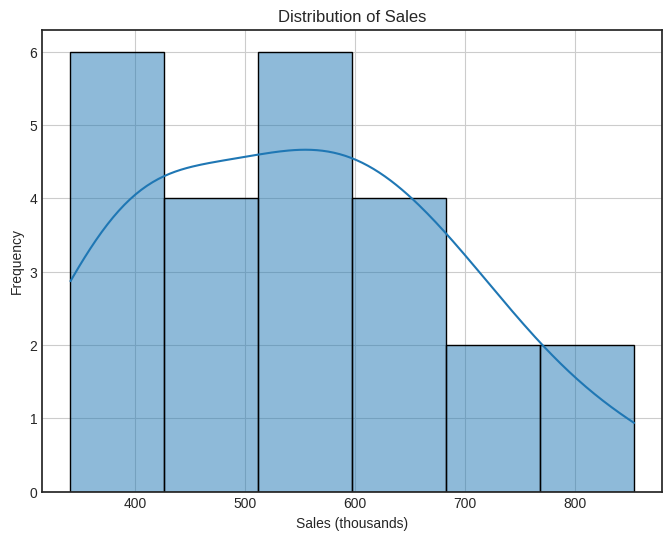

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales (thousands)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Observations on Sales Distribution:**
- The distribution of Sales appears to be somewhat right-skewed, meaning there is a tail towards higher sales values.
- The peak of the distribution is around the lower to mid-range of sales values.
- The distribution is not perfectly normal, which appears to be common in real-world time series data.
- The presence of higher sales values (especially in the 4th quarter) contributes to the right skew.

#### Visualize Quarterly trends (1 point)

Create quarterly subplots to visualize the data in each quarter across all years

Hint: statsmodels' `quarter_plot()` method

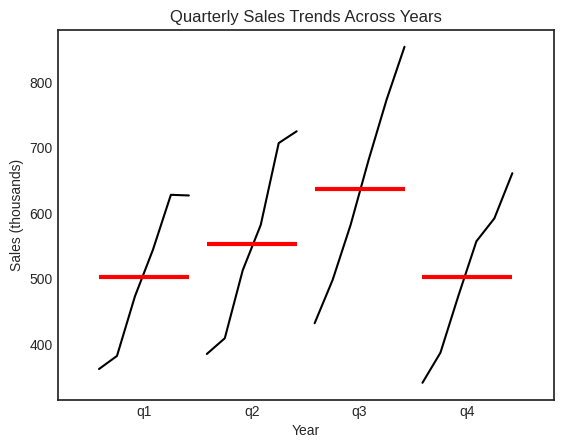

In [ ]:
quarter_plot(df['Sales'])
plt.title('Quarterly Sales Trends Across Years')
plt.xlabel('Year')
plt.ylabel('Sales (thousands)')
plt.show()

#### Visualize the distribution of Sales in each year within a single plot (1 point)

- Do the distribution peaks shift to the right from 2012 to 2017? What does this indicate?
- Is there a change in the width of the distributions from 2012 to 2017? What does it signify?

Hint: `sns.distplot(hist=False)`

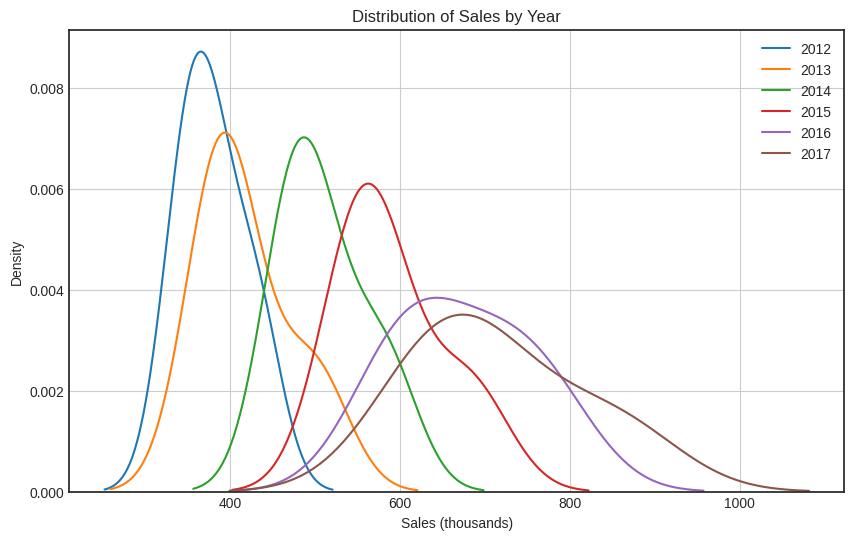

In [ ]:
plt.figure(figsize=(10, 6))
for year in years:
    sns.distplot(df[df['year'] == year]['Sales'], hist=False, label=year)

plt.title('Distribution of Sales by Year')
plt.xlabel('Sales (thousands)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

**Observations on Sales Distribution by Year:**
- The distribution peaks generally shift to the right from 2012 to 2017. This indicates an overall increase in the typical sales values over the years.
- The distributions also appear to become wider from 2012 to 2017. This signifies that the variability or range of sales values within a year has increased over time. This could be due to more pronounced seasonality or larger fluctuations in sales across different quarters in later years.

#### Visualize the quarterly sales for each year using a stacked bar plot (1 point)

<Figure size 1200x700 with 0 Axes>

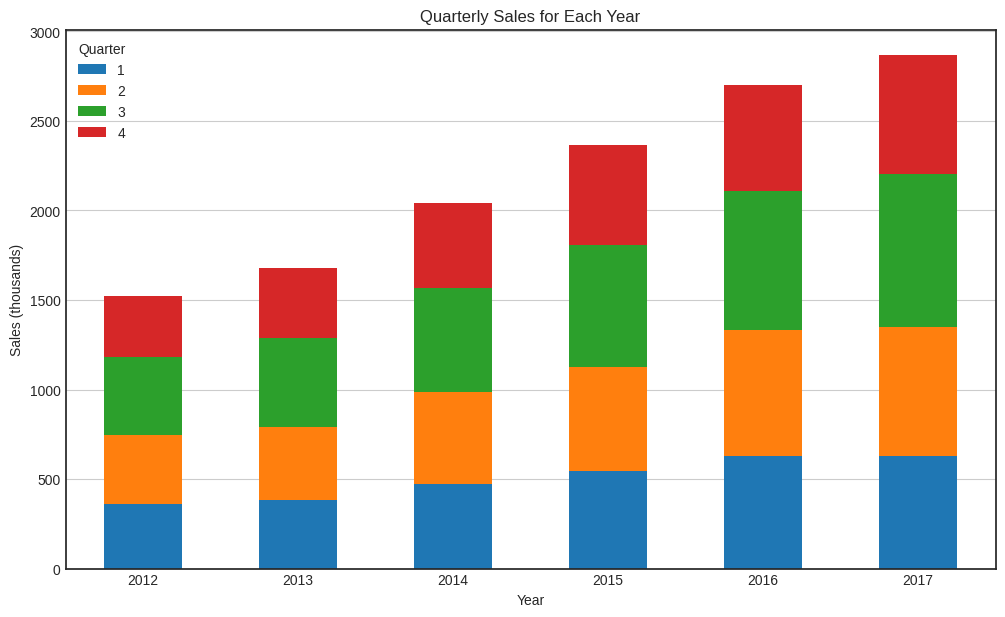

In [ ]:
# Reshape data for stacked bar plot
df_pivot = df.pivot_table(index='year', columns='quarter', values='Sales')

plt.figure(figsize=(12, 7))
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 7))

plt.title('Quarterly Sales for Each Year')
plt.xlabel('Year')
plt.ylabel('Sales (thousands)')
plt.xticks(rotation=0)
plt.legend(title='Quarter')
plt.grid(axis='y')
plt.show()

#### Check if the time series data is stationary (1 point)

Hint:

For the series to be stationary, it must have:
 - constant mean
 - constant variance
 - constant covariance (uncorrelated)

Visualize if the mean is constant

Hint: [Rolling mean](https://pandas.pydata.org/docs/reference/api/pandas.core.window.rolling.Rolling.mean.html)

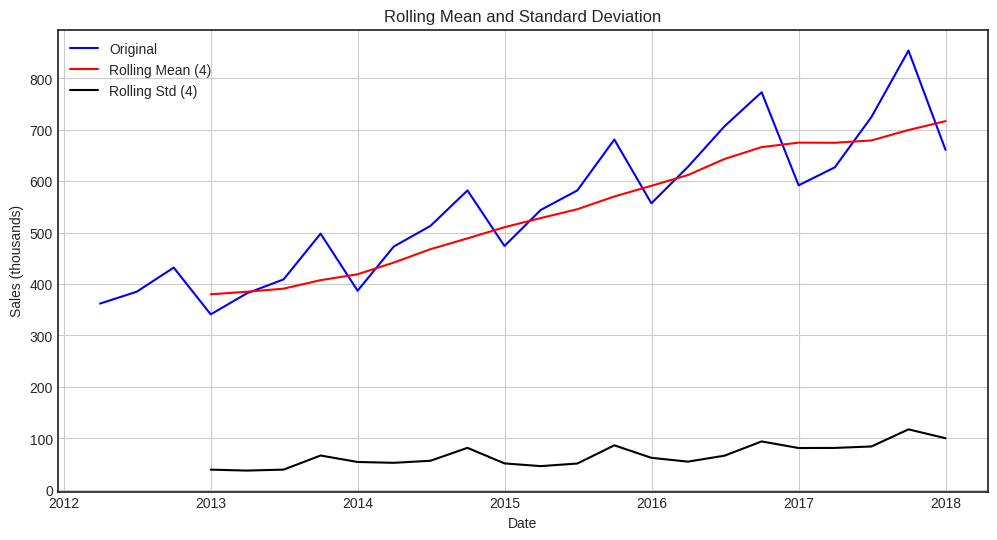

In [ ]:
# Function to plot rolling statistics
def plot_rolling_statistics(timeseries, window):
    """Plots the original time series, rolling mean, and rolling standard deviation."""
    rolling_mean = timeseries.rolling(window=window).mean()
    rolling_std = timeseries.rolling(window=window).std()

    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, label='Original', color='blue')
    plt.plot(rolling_mean, label=f'Rolling Mean ({window})', color='red')
    plt.plot(rolling_std, label=f'Rolling Std ({window})', color='black')
    plt.title('Rolling Mean and Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel('Sales (thousands)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Choose a window size (e.g., 4 for quarterly data)
window_size = 4
plot_rolling_statistics(df['Sales'], window_size)

**Observation: rolling mean**

The rolling mean shows a clear upward trend, indicating that the mean is not constant over time.
This visual inspection suggests that the time series is likely not stationary due to the presence of a trend.
Further statistical tests like the Augmented Dickey-Fuller test would be needed for a more formal confirmation.


Visualize if the variance is constant

Hint: [Rolling standard deviation](https://pandas.pydata.org/docs/reference/api/pandas.core.window.rolling.Rolling.std.html)

In [ ]:
# Rolling standard deviation - is the black line in graph above

**Observation: rolling standard deviation**

The rolling standard deviation (the black line in the plot above) also appears to be increasing over time, particularly in the later years.
This suggests that the variance of the series is not constant.
The increasing spread of the rolling standard deviation indicates heteroscedasticity, which is another characteristic of non-stationary time series.

Based on the observations report whether the series is stationary or not.

#### Visualize the patterns in time series - trend, seasonality, residuals (1 point)

Hint: See Module 5 - AST2 EDA > Patterns in a time series

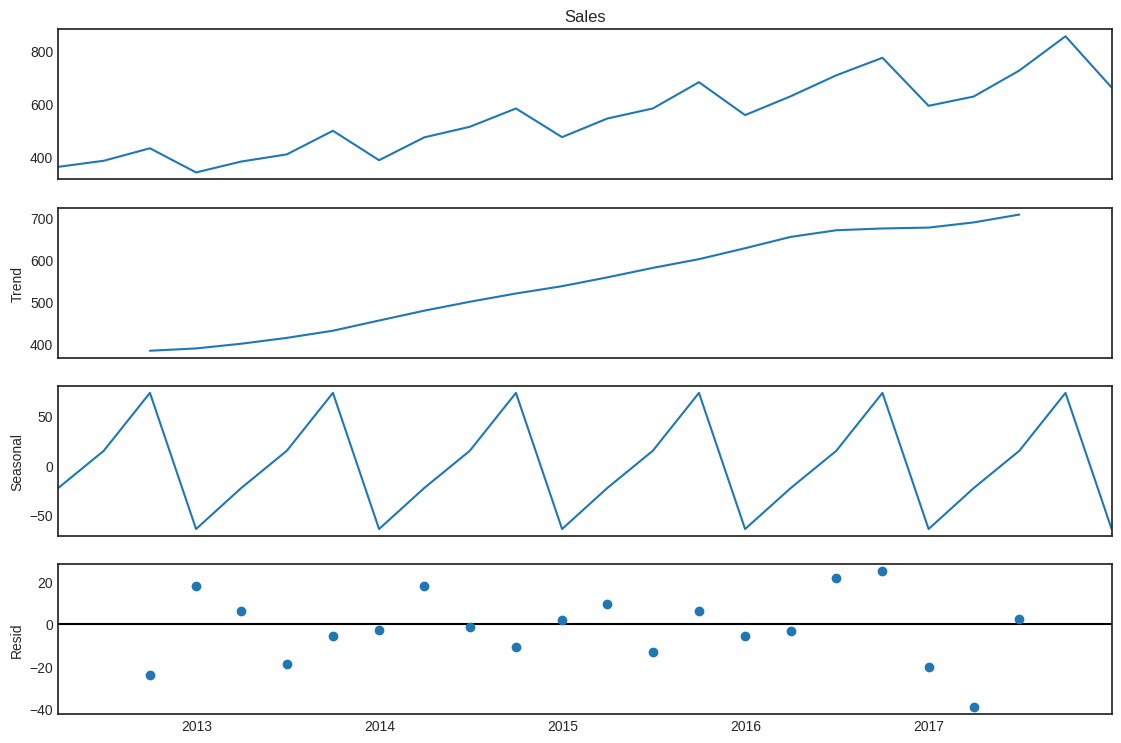

In [ ]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Sales'], model='additive') # Use additive model as the trend and seasonality seem additive

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

Report if there are any observable patterns in terms of trend, seasonality , or cyclic behavior.

The resulting figure shows four subplots:
1. **Original:** The original time series data.
2. **Trend:** The estimated trend component, showing the underlying direction of the series.
3. **Seasonal:** The estimated seasonal component, showing the repeating pattern within each year.
4. **Residual:** The remaining part of the series after removing the trend and seasonal components, representing random fluctuations or noise.

**Observations from Time Series Decomposition:**
Based on the decomposition plot:
- **Trend:** There is a clear upward trend in the data. The trend component shows a general increase in sales over the entire period, indicating that sales are growing over time.
- **Seasonality:** There is a strong seasonal pattern. The seasonal component clearly shows a repeating pattern within each year, likely peaking in the fourth quarter and being lower in earlier quarters. This indicates consistent quarterly fluctuations in sales.
- **Residuals:** The residuals appear to be relatively random, with no clear patterns or significant spikes, although there might be some slight variations in volatility over time.
- **Cyclic:** While the data spans a relatively short period (6 years), there isn't strong visual evidence of a distinct, long-term cyclical pattern beyond the overall upward trend. Any potential cyclical behavior might be intertwined with the trend or less pronounced than the seasonality.

### **Detrending**

####  Detrend the time series (0.5 point)

Detrending a time series is to remove the trend component from a time series.

Hint:
- Subtract the line of best fit `scipy.signal.detrend()`

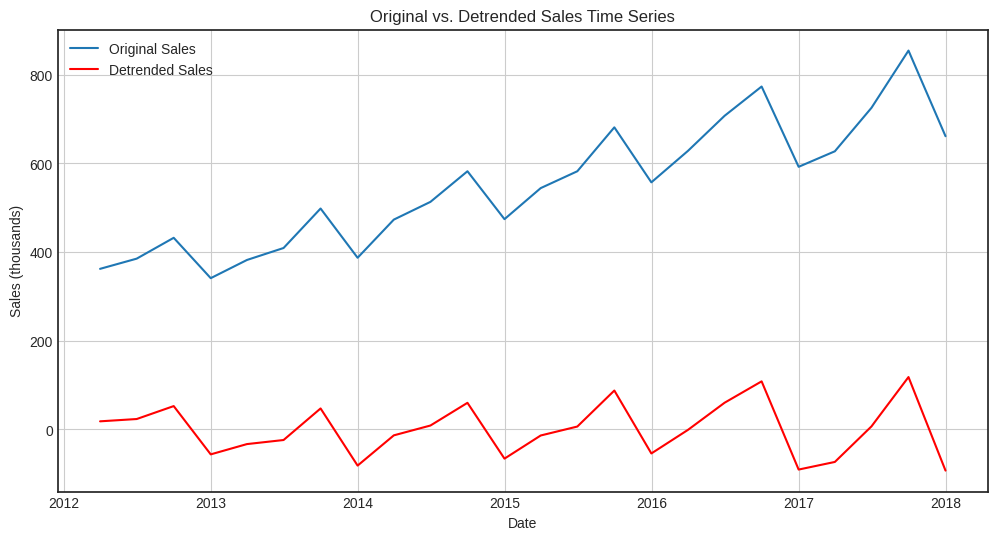

In [ ]:
detrended_sales = signal.detrend(df['Sales'])

# Convert the detrended NumPy array back to a Pandas Series with the original index
df['Detrended Sales'] = pd.Series(detrended_sales, index=df.index)

# Plot the original and detrended series for comparison
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Original Sales')
plt.plot(df['Detrended Sales'], label='Detrended Sales', color='red')
plt.title('Original vs. Detrended Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales (thousands)')
plt.legend()
plt.grid(True)
plt.show()

### **Lag Plots** (Optional)

#### Visualize the Lag plots

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

For reference, see Module 5 - AST2 > Lag Plots

Hint: `pandas.plotting.lag_plot()`

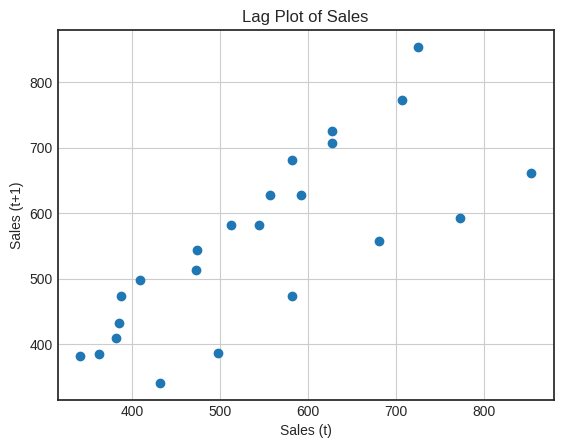

In [ ]:
# A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

lag_plot(df['Sales'])
plt.title('Lag Plot of Sales')
plt.xlabel('Sales (t)')
plt.ylabel('Sales (t+1)')
plt.grid(True)
plt.show()

### Report Analysis

- Give the summary about this time series

**Summary of French Retail Sales Time Series Analysis:**

This time series dataset represents quarterly retail sales data from a French company spanning from March 2012 to December 2017. The initial sales figures were large and were scaled down by dividing by 1000 for easier handling. There were no missing values in the dataset.

Visualizations and statistical analysis reveal key characteristics of the time series:

1.  **Trend:** A clear upward trend is observed in the sales data throughout the period. Both the raw time series plot and the rolling mean demonstrate a consistent increase in sales over the years.
2.  **Seasonality:** There is a strong and consistent seasonal pattern. Sales typically peak in the fourth quarter of each year, followed by lower sales in the earlier quarters. The seasonal decomposition plot clearly isolates this repeating quarterly pattern.
3.  **Distribution:** The distribution of sales is somewhat right-skewed, with higher frequency at lower sales values and a tail extending to higher values, particularly influenced by the strong fourth-quarter sales. When examining the distribution by year, the peaks shift to the right over time, indicating increasing typical sales, and the distributions become wider, suggesting increased variability in sales within a year.
4.  **Stationarity:** The time series is non-stationary. This is evident from the non-constant rolling mean (due to the trend) and the increasing rolling standard deviation (suggesting non-constant variance).
5.  **Autocorrelation:** The lag plot shows a clear positive linear relationship between sales at time `t` and sales at time `t+1`. This indicates strong positive autocorrelation, meaning that the sales value in one quarter is highly correlated with the sales value in the following quarter. This is expected in a time series with both trend and seasonality.
6.  **Detrending:** The detrending process successfully removed the linear trend component, resulting in a series that fluctuates around zero, highlighting the remaining seasonal and residual components.

In summary, the French Retail Sales time series exhibits a clear upward trend and strong quarterly seasonality. The sales are not stationary and show significant autocorrelation. These characteristics are typical of many business time series and require appropriate forecasting methods that can account for trend and seasonality.